# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # importar librerías

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv') #completa el código
usage = pd.read_csv('/datasets/usage.csv') #completa el código

In [3]:
plans.head(5) # mostrar las primeras 5 filas de plans

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
users.head(5) # mostrar las primeras 5 filas de users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
usage.head(5) # mostrar las primeras 5 filas de usage

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)



plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
plans.info() # inspección de plans con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
users.info() # inspección de users con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
usage.info() # inspección de usage con .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
print(users.isna().sum())  # Cantidad de valores nulos)
print(users.isna().mean())  # Proporción de valores nulos)

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [11]:
print(usage.isna().sum()) # cantidad de nulos para usage
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  

- Tabla users
- Columna city – 11.73% de valores nulos
- La ausencia de ciudad en casi el 12% de los registros puede afectar análisis de segmentación geográfica, campañas locales o comparativas regionales.
- Este porcentaje no es crítico, pero sí relevante si se pretende analizar comportamiento por ubicación.
- Se recomienda:
- Evaluar si los nulos se concentran en un periodo, tipo de cliente o canal de registro.
- Considerar imputación solo si el análisis geográfico es clave.
- Columna churn_date – 88.35% de valores nulos
- Este no representa un problema de calidad de datos.
- El valor nulo tiene significado operativo: indica que el cliente continúa activo.
- Los nulos deben conservarse.
- Considerar que esta columna puede utilizarse como variable binaria:
- Con fecha → cliente que canceló
- Nulo → cliente activo

- Tabla usage
- Columna date – 0.125% de valores nulos
- La proporción es mínima y no representa riesgo analítico.
- Estos registros pueden eliminarse sin impacto estadístico relevante.
- Columna duration – 55.19% de valores nulos
- Este nivel de ausencia es alto, pero probablemente tiene explicación estructural y no es un error.
- Es posible que:
- Esta variable solo aplique para llamadas de voz.
- Los registros nulos correspondan a interacciones de otro tipo (por ejemplo, mensajes).
- Importante- Los nulos podrían estar diferenciando tipos de uso del servicio, no fallas en captura.
- Columna length – 44.74% de valores nulos
- Caso similar a duration.
- La ausencia podría estar asociada a que ciertos eventos no generan un valor de longitud (por ejemplo, llamadas sin conexión o servicios distintos).
- Interpretación potencial:
- Los nulos podrían estar segmentando naturalmente el tipo de interacción del usuario.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
users[["user_id","age"]].describe()  # explorar columnas numéricas de users


,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


Haz doble clic en este bloque y escribe qué ves.

- Columna user_id
- Es un identificador único para cada cliente.
- Los valores van del 10,000 al 13,999, lo que confirma la existencia de 4,000 registros únicos.
- No presenta duplicados, lo que garantiza integridad referencial para realizar joins entre tablas.
- Columna age
- Se detectaron valores atípicos como -999, los cuales no representan edades válidas.
 ...

In [13]:
usage[["id","user_id","duration","length"]].describe() # explorar columnas numéricas de usage

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id`
- La columna id corresponde al identificador de cada registro de servicio por lo que está bien que empiece en 1 y termine en 40,000
- La columna user_id corresponde al identificador de cliente y es correcto que el mínimo sea 10,000 y máximo 13,999
- La columna duration corresponde a la duración de las llamadas son 40,000 registros de los cuales 17,924 fueron llamadas y por esa razón 22,076 son registros nulos correctos, el mínimo de minutos es 0 por los nulos y el máximo 120 minutos, que es un número alto pero no imposible, y como se encuentra lejos del promedio, recomiendo investigar más.
- La columna length corresponde a los mensajes de 40,000 registros 22,104 fueron mensajes y hay 17,896 vacíos lo cual es correcto, el mínimo es 0 por lo registros vacíos y el máximo es 1,490 el cual es un registro muy alto que se encuentra alejado del promedio, por lo que recomiendo que se revise.
- Si de 40,000 registros 17,924 fueron llamadas 22,076 deben ser mensajes pero los registros muestran 22,104 mensajes por lo que se tiene que revisar la diferencia de 28

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']

for columna in columnas_user:
    print(f"\nValores únicos en {columna}")
    print(users[columna].nunique())
    print(users[columna].unique())
    print(users[columna].value_counts().sort_index())


Valores únicos en city
7
['Medellín' '?' 'CDMX' 'Bogotá' 'GDL' 'MTY' nan 'Cali']
?            96
Bogotá      808
CDMX        730
Cali        424
GDL         450
MTY         407
Medellín    616
Name: city, dtype: int64

Valores únicos en plan
2
['Basico' 'Premium']
Basico     2595
Premium    1405
Name: plan, dtype: int64



- La columna `city` tiene valores erroneos como "?" y nulos
- La columna `plan` no tiene valores erroneos ni nulos


In [15]:
# explorar columna categórica de usage
usage['type'].nunique() # completa el código
print(usage["type"].nunique()," son los valores únicos de type:", usage["type"].unique())

2  son los valores únicos de type: ['call' 'text']


- La columna `type` se refiere al tipo de servicio que usó el cliente "call" o "text"

---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?

**Data Frame users:**

-	columna city, tiene valores nulos correspondientes al 11.73%
-	columna churn_date, tiene valores nulos correspondientes al 88.35%, pero vamos a ignorarlos porque en esta columna los nulos representan a los usuarios activos.
-	La columna age tiene valores sentinels como -999 que deben ser corregidos
-	La columna city tiene valores erroneos como "?" y nulos que deben ser corregidos

**Data Frame usage:**

-	columna date, tiene valores nulos correspondientes al 0.125% lo cual se ignorará porque no es representativo
-	columna duration, tiene valores nulos correspondientes al 55.19% (22,076 registros) se debe investigar porque puede ser que no tenga información de duración de llamada por ser un servicio de mensajes de texto, después de la investigación, se concluye que del total de 40,000 registros 17,924 fueron llamadas, por lo que es correcto que haya 22,076 registros vacíos.
-	columna length, tiene valores nulos correspondientes al 44.74% (17,896 registros) se debe investigar porque puede ser que no tenga información de length por ser un servicio de llamada, después de la investigación concluimos que del total de 40,000 registros 22,104 fueron mensajes por lo que es correcto que haya 17,896 vacíos.
-	La columna duration corresponde a la duración de las llamadas en minutos, siendo el mínimo de 0 valor tomado por los nulos y el máximo 120 minutos, que es un número alto pero no imposible, sin embargo, como se encuentra lejos del promedio, recomiendo investigar más.
-	La columna length corresponde al número de mensajes enviados, siendo el mínimo de 0, valor tomado por los registros nulos y el máximo es 1,490 el cual es un registro muy alto que se encuentra alejado del promedio, por lo que recomiendo que se revise.

- Si de 40,000 registros 17,924 fueron llamadas 22,076 deben ser mensajes pero los registros muestran 22,104 mensajes por lo que se tiene que revisar la diferencia de 28


### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users["reg_date"], errors="coerce") # completa el código

In [17]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage["date"],errors="coerce")  # completa el código

In [18]:
# Revisar los años presentes en `reg_date` de users
users["year"]=users["reg_date"].dt.year
print("Años unicos", users["year"].unique())
print("Conteo por año")
print(users["year"].value_counts().sort_index())


Años unicos [2022 2026 2023 2024]
Conteo por año
2022    1314
2023    1316
2024    1330
2026      40
Name: year, dtype: int64


En `reg_date`, ... haz doble clic en este bloque y escribe qué ves.
- En la columna "reg_date" encontramos registros con años (2022, 2023 y 2026), que es el año de registro de los clientes, como estamos revisando información hasta el 2024, el año 2026 están fuera del rango de revisión y debemos investigar más.

In [19]:
# Revisar los años presentes en `date` de usage
usage["year"]=usage["date"].dt.year
print("Años unicos", usage["year"].unique())
print("Conteo por año")
print(usage["year"].value_counts().sort_index())

Años unicos [2024.   nan]
Conteo por año
2024.0    39950
Name: year, dtype: int64


En `date`, ... haz doble clic en este bloque y escribe qué ves.  
Basaremos el análisis en estas fechas.
El analisis es del año 2024 y de 40,000 registros tenemos 39,950 registros del 2024 y el resto, es decir 50 registros, son nulos 

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

En la columna reg_date de users, hay registros de clientes con el año 2026 los cuales debemos revisar
En la columna date de usage, hay 50 registros nulos de 40,000 es el 0.125% no es relevante, por lo que sugiero omitir


---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:
# Reemplazar -999 por la mediana de age
age_mediana = users["age"].median()
users['age'] = users["age"].replace([-999],age_mediana)


# Verificar cambios
users['age'].describe()


count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [21]:
# Reemplazar ? por NA en city
users["city"]=users["city"].replace(["?","nan"],pd.NA)

# Verificar cambios
users["city"].unique()
users["city"].value_counts().sort_index()
print(f"Registros después de [operación]: {len(users)}")

Registros después de [operación]: 4000


In [22]:
# Marcar fechas futuras como NA para reg_date
users["year"]=users["year"].replace([2026],pd.NA)

# Verificar cambios

users["year"].unique()
users["year"].value_counts().sort_index()

2022    1314
2023    1316
2024    1330
Name: year, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [23]:

# Verificación MAR en usage (Missing At Random) para duration
mar_duration = usage["duration"].isna().groupby(usage["type"]).agg("sum")
print(mar_duration)
print(f"Registros después de [operación]: {len(usage)}")

type
call        0
text    22076
Name: duration, dtype: int64
Registros después de [operación]: 40000


In [24]:
# Verificación MAR en usage (Missing At Random) para length
mar_length = usage["length"].isna().groupby(usage["type"]).agg("sum")
print (mar_length)
print(f"Registros después de [operación]: {len(usage)}")

type
call    17896
text        0
Name: length, dtype: int64
Registros después de [operación]: 40000


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

MAR en la columna duration, los nulos tienen dependenca de la columna type, ya que si dice que es "text" significa que fue un servicio de mensaje de texto por lo que es correcto que haya 22,076 registros vacíos ya que 22,076 son registros de servicios de mensajes.

MAR en la columna length, los nulos tienen dependencia de la columna type, ya que si dice que es "call" significa que fue un servicio de llamada y por ende, es correcto que la columna de length haya 17,896 vacíos ya que esos fueron 17,896 servicios de llamadas.



In [25]:

# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby("user_id").agg({"is_text": "sum","is_call": "sum","duration": "sum","length": "sum"}).reset_index()

# observar resultado
usage_agg.head(3)
print(f"Usuarios únicos en users: {users['user_id'].nunique()}")
print(f"Usuarios únicos en usage: {usage['user_id'].nunique()}")

print(f"Registros después de [operación]: {len(users)}")
print(f"Registros después de [operación]: {len(usage)}")
print(f"Registros después de [operación]: {len(usage_agg)}")


Usuarios únicos en users: 4000
Usuarios únicos en usage: 3999
Registros después de [operación]: 4000
Registros después de [operación]: 40000
Registros después de [operación]: 3999


In [62]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={"is_text": "mensajes_de_texto", "is_call":"llamadas_realizadas", "duration":"total_minutos", "length":"total_caracteres"})

# observar resultado
usage_agg.head(3)

,user_id,mensajes_de_texto,llamadas_realizadas,total_minutos,total_caracteres,grupo_uso
0,10000,7,3,23.70,258.0,Bajo uso
1,10001,5,10,33.18,226.0,Uso medio
2,10002,5,2,10.74,225.0,Bajo uso


In [63]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = usage_agg 
user_profile.head(5)

,user_id,mensajes_de_texto,llamadas_realizadas,total_minutos,total_caracteres,grupo_uso
0,10000,7,3,23.70,258.0,Bajo uso
1,10001,5,10,33.18,226.0,Uso medio
2,10002,5,2,10.74,225.0,Bajo uso
3,10003,11,3,8.99,530.0,Bajo uso
4,10004,4,3,8.01,229.0,Bajo uso


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [64]:
# Resumen estadístico de las columnas numéricas

columnas_numericas = ['mensajes_de_texto', 'llamadas_realizadas', 'total_minutos', 'total_caracteres']
print(user_profile[columnas_numericas].describe())

       mensajes_de_texto  llamadas_realizadas  total_minutos  total_caracteres
count        3999.000000          3999.000000    3999.000000       3999.000000
mean            5.524381             4.478120      23.317054        288.128032
std             2.358416             2.144238      18.168095        180.906841
min             0.000000             0.000000       0.000000          0.000000
25%             4.000000             3.000000      11.120000        184.000000
50%             5.000000             4.000000      19.780000        268.000000
75%             7.000000             6.000000      31.415000        361.000000
max            17.000000            15.000000     155.690000       2028.000000


In [65]:
# Distribución porcentual del tipo de plan
print(users["plan"].value_counts(normalize=True)*100)

Basico     64.875
Premium    35.125
Name: plan, dtype: float64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

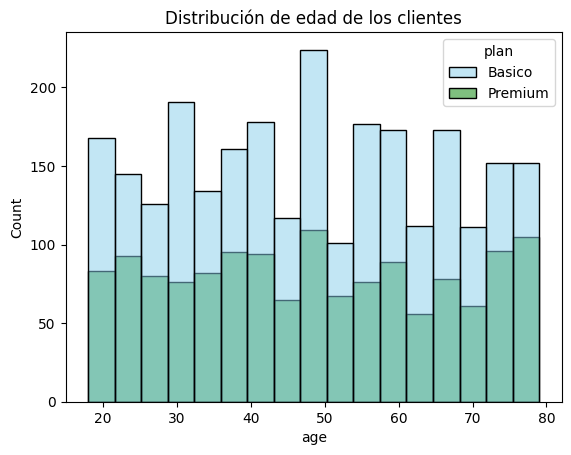

plan,Basico,Premium,All
age,,,
18.0,44,21,65
19.0,43,22,65
20.0,41,23,64
21.0,40,17,57
22.0,35,22,57
...,...,...,...
76.0,36,25,61
77.0,35,23,58
78.0,45,34,79


In [66]:
# Histograma para visualizar la edad (age)

sns.histplot(data = users, x="age", hue="plan", palette = ("skyblue","green" ))
plt.title("Distribución de edad de los clientes")
plt.show()

#cuadro de datos
pd.crosstab(index=users["age"] , columns=users["plan"], margins=True)


💡Insights: 
- La distribución de edad en ambos planes es bastante similar, sin diferencias marcadas entre usuarios del plan Básico y Premium. No se observa una concentración clara de un grupo etario específico en alguno de los dos planes, lo que sugiere que la elección del plan no está fuertemente influenciada por la edad.

- Dentro del plan Premium se aprecia una ligera presencia en rangos de edad media (30–55 años), pero no es lo suficientemente pronunciado como para considerarlo un patrón dominante.

- Tipo de distribución:
- Aproximadamente simétrica, con ligera dispersión uniforme a lo largo de los rangos de edad.


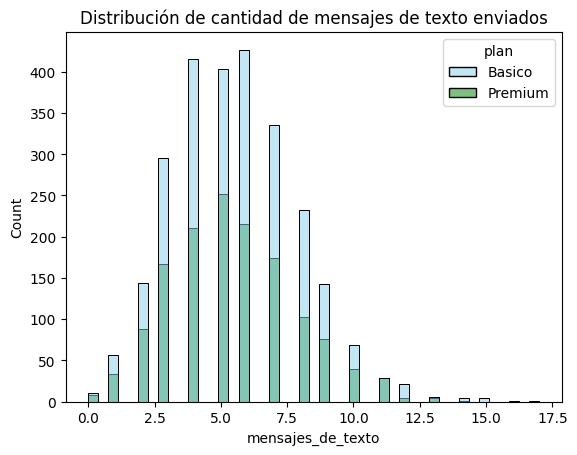

plan,Basico,Premium,All
mensajes_de_texto,,,
0,10,8,18
1,56,33,89
2,144,88,232
3,295,167,462
4,415,211,626
5,403,252,655
6,427,216,643
7,335,174,509
8,232,102,334


In [67]:
# Histograma para visualizar la cant_mensajes

sns.histplot(data = user_profile, x="mensajes_de_texto", hue=users["plan"], palette = ("skyblue","green" ))
plt.title("Distribución de cantidad de mensajes de texto enviados")
plt.show()


#cuadro de datos
pd.crosstab(index=user_profile["mensajes_de_texto"] , columns=users["plan"], margins=True )


💡Insights: 

- Los usuarios del plan Básico tienden a concentrarse en rangos medios de envío de mensajes (alrededor de 4 a 7), mostrando una mayor frecuencia en comparación con Premium. Esto puede indicar que quienes tienen el plan Básico dependen más del uso de mensajes como forma principal de comunicación.

- Dentro del plan Premium también se observa uso en rangos similares, pero con menor concentración relativa, lo que podría sugerir que estos usuarios diversifican su consumo hacia otros servicios (llamadas o datos).

- Tipo de distribución:
- Sesgada a la derecha (cola larga hacia valores altos), lo que indica que pocos usuarios envían grandes cantidades de mensajes.

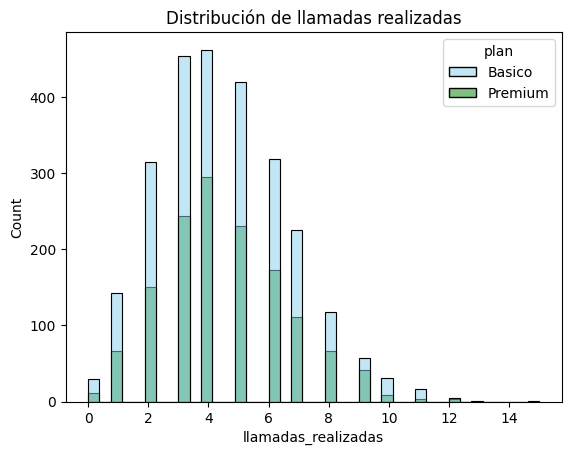

plan,Basico,Premium,All
llamadas_realizadas,,,
0,30,11,41
1,143,67,210
2,315,151,466
3,453,243,696
4,462,295,757
5,419,230,649
6,318,173,491
7,225,111,336
8,118,66,184


In [68]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data = user_profile, x="llamadas_realizadas", hue=users["plan"], palette = ("skyblue","green" ))
plt.title("Distribución de llamadas realizadas")
plt.show()

#cuadro de datos
pd.crosstab(index=user_profile["llamadas_realizadas"] , columns=users["plan"], margins=True )



💡Insights: 
- Los usuarios del plan Básico tienden a realizar entre 3 y 6 llamadas con mayor frecuencia, mostrando una concentración clara en este rango. El plan Premium presenta un patrón muy similar, aunque con una ligera presencia en valores más altos, lo que podría sugerir un uso más intensivo del servicio de voz.

- En general, no existe una diferencia drástica en el comportamiento de llamadas entre ambos planes, lo que indica que este servicio es utilizado de manera relativamente homogénea.

- Tipo de distribución:
- Sesgada a la derecha, ya que la mayoría de los usuarios se concentra en pocas llamadas y hay pocos casos con valores altos.

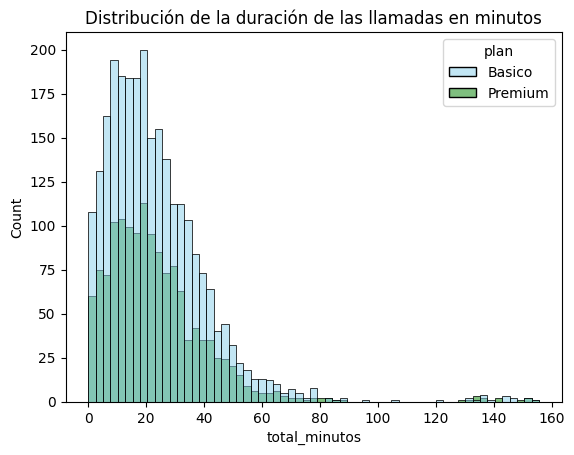

plan,Basico,Premium,All
total_minutos,,,
False,2576,1392,3968
True,18,13,31
All,2594,1405,3999


In [69]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data = user_profile, x="total_minutos", hue=users["plan"], palette = ("skyblue","green" ))
plt.title("Distribución de la duración de las llamadas en minutos")
plt.show()

#cuadro de datos:
pd.crosstab(index=(user_profile["total_minutos"]>100), columns=users["plan"], margins=True)


💡Insights: 
- Los usuarios del plan Básico muestran mayor concentración en rangos bajos de minutos consumidos (principalmente debajo de 40 minutos), mientras que en el plan Premium se observa presencia en rangos más amplios y algunos valores considerablemente altos.

- Esto puede sugerir que los clientes Premium hacen un uso más intensivo del servicio de voz en términos de duración, aunque la mayoría de los usuarios de ambos planes se mantiene en niveles moderados de consumo.

- Tipo de distribución:
- Fuertemente sesgada a la derecha, con una cola larga que indica la existencia de pocos usuarios con consumos muy altos de minutos.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

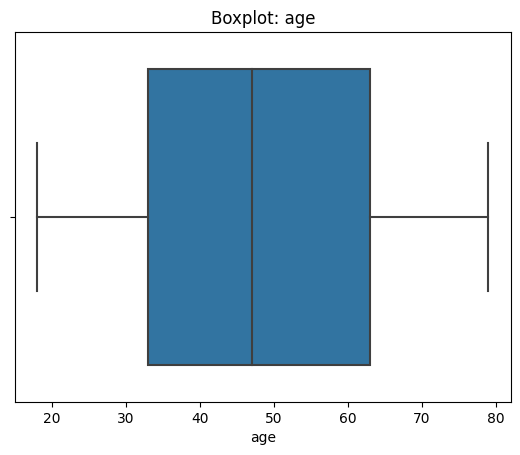

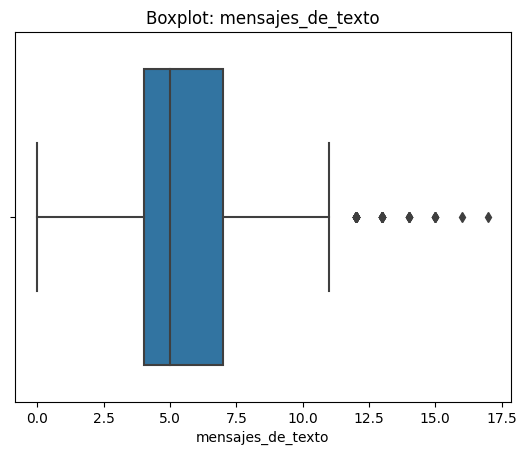

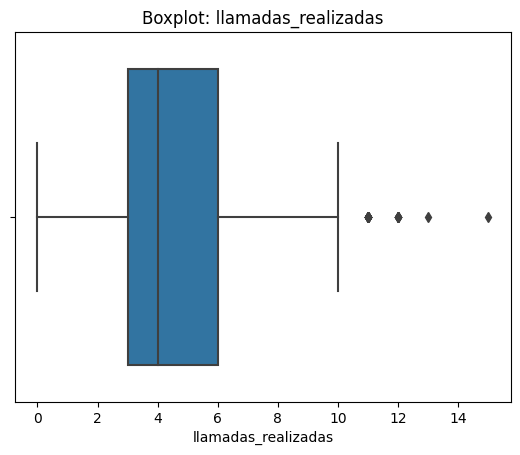

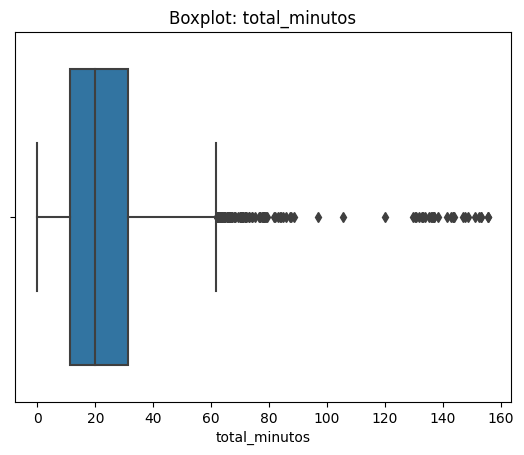

In [70]:
# Visualizando usando BoxPlot 

sns.boxplot(data=users, x="age")
plt.title("Boxplot: age")
plt.show()

columnas_numericas = [ 'mensajes_de_texto', 'llamadas_realizadas', 'total_minutos']

for col in columnas_numericas:
    sns.boxplot(data = user_profile, x = col )
    plt.title(f"Boxplot: {col}")
    plt.show()
    

💡Insights: 
- Age: No presenta ourliers
- cant_mensajes: Si hay outliers
- cant_llamadas: Si hay outliers
- cant_minutos_llamada: Si hay outliers

In [71]:
# Calcular límites con el método IQR
columnas_limites = ["mensajes_de_texto","llamadas_realizadas","total_minutos"]
iqr3_= {}
iqr1_= {} 
iqr_= {} 
limite_superior_ = {}

for col in columnas_limites:
    iqr3_[col]= user_profile[col].quantile(0.75)
    iqr1_[col]= user_profile[col].quantile(0.25)
    iqr_[col]=  iqr3_[col] - iqr1_[col]
    limite_superior_[col] = iqr3_[col] + (1.5 * iqr_[col])
    
    print(f"limite superior para_{col} : {limite_superior_[col]}")   


limite superior para_mensajes_de_texto : 11.5
limite superior para_llamadas_realizadas : 10.5
limite superior para_total_minutos : 61.8575


In [86]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,mensajes_de_texto,llamadas_realizadas,total_minutos
count,4000.000000,4000.000000,4000.000000
mean,5.523000,4.477000,23.311225
std,2.359738,2.145139,18.169564
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.107500
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.412500
max,17.000000,15.000000,155.690000



💡Insights: 
- mensajes_de_texto: mantener o no outliers, porqué? Aunque hay datos que se salen del límite superior del IQR (11.5), la empresa dentro de sus planes, incluyen mensajes de 100 mensajes y 500 mensajes respectivamente
- llamadas_realizadas: mantener o no outliers, porqué? El limite superior del IQR es de 10.5 y los outliers son de 15 llamadas, sin embargo, no es excesivo, por lo que mi sugerencia es mantener los outliers.
- total_minutos: mantener o no outliers, porqué? el plan básico tiene incluidos 100 minutos y el plan premium 600 minutos, sin embargo, en el histograma muestra que hubo 18 clientes con plan básico que sí usaron más de los 100 mínutos incluidos en su plan.


---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [73]:
print(f"Usuarios únicos en user_profile ANTES: {user_profile['user_id'].nunique()}")
print()

# Encontré que el user_id 11082 no ha tenido registros de movimientos de servicios.

missing_user = users[~users['user_id'].isin(usage['user_id'])]
print("Usuario sin actividad:")
print(missing_user)
print()


# Crear el user_id 11082 en el dataFrame user_profile

nuevo_registro = {
    'user_id': 11082,
    'mensajes_de_texto': 0,
    'llamadas_realizadas': 0,
    'total_minutos': 0,
    'total_caracteres': 0,
 
}

# Convertir a DataFrame y agregar
nueva_fila = pd.DataFrame([nuevo_registro])
user_profile = pd.concat([user_profile, nueva_fila], ignore_index=True)

print(f"Usuarios únicos en user_profile DESPUES: {user_profile['user_id'].nunique()}")

print(f"Registros después de [operación]: {len(user_profile)}")


Usuarios únicos en user_profile ANTES: 3999

Usuario sin actividad:
      user_id first_name last_name   age  city                      reg_date  \
1082    11082       Luis     Gomez  39.0  CDMX 2022-10-24 06:31:03.465866468   

        plan churn_date  year  
1082  Basico        NaN  2022  

Usuarios únicos en user_profile DESPUES: 4000
Registros después de [operación]: 4000


In [74]:
user_profile["grupo_uso"] = np.where(
    (user_profile["mensajes_de_texto"]<5) | (user_profile["llamadas_realizadas"]<5) ,
    "Bajo uso",
        np.where( (user_profile["mensajes_de_texto"]<10) | (user_profile["llamadas_realizadas"]<10), 
        "Uso medio",
        "Alto uso"
        ) 
    )

In [75]:
# verificar cambios
user_profile.head()

,user_id,mensajes_de_texto,llamadas_realizadas,total_minutos,total_caracteres,grupo_uso
0,10000,7,3,23.70,258.0,Bajo uso
1,10001,5,10,33.18,226.0,Uso medio
2,10002,5,2,10.74,225.0,Bajo uso
3,10003,11,3,8.99,530.0,Bajo uso
4,10004,4,3,8.01,229.0,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [78]:
# Crear columna grupo_edad

user_profile["grupo_edad"]= np.where(
    (users["age"]<30),"Joven",
        np.where((users["age"]<60),"Adulto",
        "Adulto Mayor"
        )
)

In [79]:
# verificar cambios
user_profile.head()

,user_id,mensajes_de_texto,llamadas_realizadas,total_minutos,total_caracteres,grupo_uso,grupo_edad
0,10000,7,3,23.70,258.0,Bajo uso,Adulto
1,10001,5,10,33.18,226.0,Uso medio,Adulto
2,10002,5,2,10.74,225.0,Bajo uso,Adulto
3,10003,11,3,8.99,530.0,Bajo uso,Adulto Mayor
4,10004,4,3,8.01,229.0,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

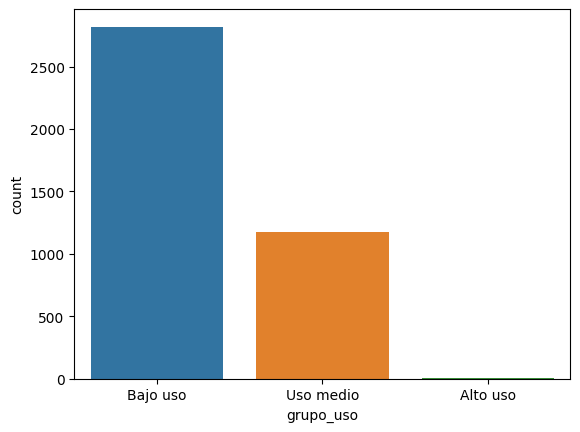

In [82]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x="grupo_uso")
plt.show()

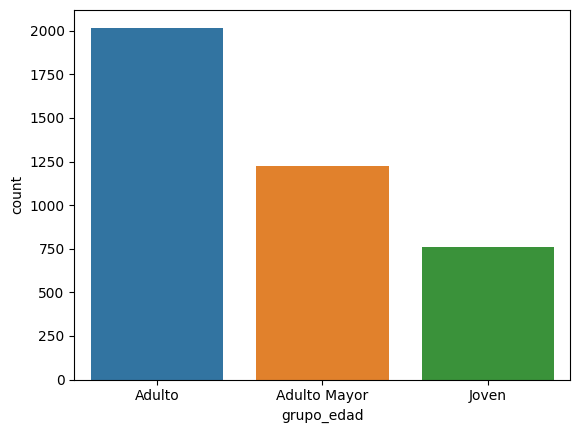

In [85]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x="grupo_edad")
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
- Valores nulos en columnas relevantes:
- city con aproximadamente 11.73% de valores faltantes, lo que limita análisis geográficos.
- duration y length con más del 40%–55% de valores nulos, los cuales no necesariamente representan errores, sino diferencias en el tipo de uso del servicio (llamadas vs mensajes).
- churn_date con 88.35% de nulos, que en realidad indican clientes activos, por lo que no se consideró un problema de calidad.
- Valores erróneos:
- La columna age contenía registros inválidos como -999, los cuales representaban placeholders de datos faltantes y fueron tratados como valores nulos.

- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?
- Usuarios de bajo consumo
- Se concentran en pocos minutos, llamadas y mensajes. Están presentes en ambos planes y no muestran una relación clara con la edad.
- Usuarios de consumo medio
- Representan la mayor parte de la base de clientes. Mantienen niveles estables de uso en llamadas y mensajes, especialmente en rangos moderados.
- Usuarios consumo alto
- Se identifican por altos valores en minutos y frecuencia de uso. Este grupo aparece con mayor presencia relativa en el plan Premium.

- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- Los clientes más valiosos parecen ser los usuarios altos, especialmente aquellos en el plan Premium, debido a que:
- Presentan mayor uso de minutos y servicios.
- Tienen mayor probabilidad de generar ingresos adicionales.
- Aprovechan más las características del plan.
- También son relevantes los usuarios de consumo medio, ya que representan la base más grande de clientes y sostienen la estabilidad del negocio.

- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
- Se identificaron usuarios con consumos significativamente más altos que el promedio, particularmente en:
- Minutos totales de llamadas.
- Cantidad de llamadas realizadas.

- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?
- Diseñar planes diferenciados por nivel de consumo:
- Planes básicos optimizados para usuarios de bajo uso.
- Planes intermedios para el segmento mayoritario.
- Planes premium enfocados en usuarios de consumo alto.
- Ofrecer upgrades personalizados:
- Detectar usuarios con consumo alto recurrente y ofrecerles migrar a planes superiores.
- Ajustar beneficios según comportamiento real:
- Dado que el uso no parece depender fuertemente de la edad, la segmentación debería centrarse en patrones de consumo más que en variables demográficas.
- Explorar planes especializados:
- Crear opciones dirigidas a clientes con alto uso de llamadas o mensajes, ya que representan oportunidades de monetización.

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**

- Durante la etapa de exploración y limpieza se identificaron inconsistencias que requerían tratamiento previo al análisis:

- Presencia de datos nulos en distintas columnas.

- Registros erróneos representados con caracteres como "?".

- Edades inválidas registradas como "-999", utilizadas probablemente como marcador de datos faltantes.

- Fechas con años fuera del periodo de análisis (por ejemplo, 2026), lo que indica errores de captura.

- Adicionalmente, se detectó un caso particular:
- El user_id 11082 aparece como cliente activo desde 2022, pero no presenta movimientos registrados durante 2024. Esto podría indicar inactividad del usuario, pérdida de engagement o inconsistencias en el registro de uso.

🔍 **Segmentación por Edad**

- No se identificó una relación clara entre la edad del cliente y el tipo de plan contratado.

- La distribución de edades es similar entre usuarios de plan Básico y Premium, lo que sugiere que la elección del plan no está fuertemente influenciada por factores demográficos.

- Sin embargo, sí se observa que la mayoría de los clientes se concentra en el plan Básico, lo que podría estar relacionado con percepción de costo-beneficio o necesidades de consumo moderadas.

📊 **Segmentación por Nivel de Uso**

- El análisis del comportamiento muestra un patrón claro: el nivel de uso general es bajo en comparación con los beneficios incluidos en los planes.

- Hallazgos principales:

- La mayoría de los usuarios envía entre 3 y 7 mensajes al mes, aun cuando los planes incluyen 100 y 500 mensajes respectivamente.

- Los clientes realizan entre 3 y 6 llamadas en promedio.

- El consumo mensual promedio de minutos ronda los 40 minutos, muy por debajo de los 100 y 600 minutos incluidos en los planes.

➡️ Esto sugiere que los servicios de llamadas y mensajes no representan el principal valor percibido por los clientes, ya que el uso real está muy por debajo de la capacidad contratada.

- En términos de negocio, esto puede indicar:

- Planes sobredimensionados para las necesidades reales.

- Un cambio en los hábitos de comunicación de los usuarios.

💡 **Recomendaciones**

- Con base en los patrones observados, se proponen las siguientes acciones estratégicas:

- Rediseñar la propuesta de valor de los planes, enfocándola menos en llamadas y mensajes tradicionales.

- Incorporar beneficios relacionados con el consumo digital actual, como acceso a redes sociales o aplicaciones populares, para aumentar el atractivo de los planes.

- Diseñar planes más ajustados al uso real del cliente, especialmente para usuarios de bajo consumo.

- Analizar el comportamiento de usuarios de alto consumo para identificar oportunidades de reactivación o riesgos de abandono.

- Estas acciones permitirían alinear mejor la oferta de ConnectaTel con los hábitos actuales de comunicación, mejorar la percepción de valor del servicio y fortalecer la retención de clientes, especialmente en segmentos más jóvenes.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`